In [15]:
from load import load_runs, conv_runs_to_epochs, extract_summary_stats
from ml import eval_all
import numpy as np
import mne

In [23]:
runs = load_runs('C:\\Users\\Sage\\Desktop\\predict_color\\data\\2_2')
#runs += load_runs('C:\\Users\\Sage\\Desktop\\predict_color\\data\\2_2_new')
#runs = load_runs('C:\\Users\\Sage\\Desktop\\predict_color\\data\\2_2_new')

In [35]:
params = {'l_freq': 1, 'h_freq': 4, 'auto_reject': 'ar', 'ica': [0], 'set_average_ref': True, 'apply_baseline': False, 'drop_ref_ch': False, 'crop': True}
epochs = conv_runs_to_epochs(runs, tmin=-2, tmax=1.9, **params)

# Get scores both ways
labels = epochs.events[:, -1]
eval_all(extract_summary_stats(epochs), labels, verbose=True)
eval_all(data=epochs.get_data(), labels=labels)

logistic: 0.28606831621537504
rf: 0.3034197012138189
logistic: 0.38356676003734824
rf: 0.3429777466542172


0.3632722533457827

## Use rest  of notebook for plotting / random exploration of data

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


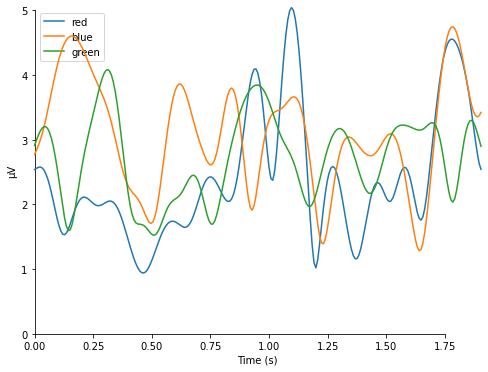

[<Figure size 576x432 with 1 Axes>]

In [34]:
mne.viz.plot_compare_evokeds(dict(red=epochs['Red'].average(),
                                  blue=epochs['Blue'].average(),
                                  green=epochs['Green'].average()))

In [ ]:
import matplotlib.pyplot as plt

def get_start(run_data):
    
    event_labels = run_data[-1]
    return np.where(event_labels == 1)[0][0]

def plot_raw_run(run_data, event_labels=None):
    
    if event_labels is not None:
        data = np.vstack([run_data._data, event_labels])
    else:
        data = run_data
    
    s = get_start(data)
    
    n_ch = len(data)-1
    fig, axes = plt.subplots(n_ch, figsize=(10, 60))

    for ch in range(n_ch):
        axes[ch].plot(data[ch, s:])
        
runs = load_runs('C:\\Users\\Sage\\Desktop\\predict_color\\data\\2_2_new')
# plot_raw_run(runs[9])

In [ ]:
frequencies = np.arange(1, 30, 3)
power = mne.time_frequency.tfr_morlet(epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot()